# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [64]:
url="https://raw.githubusercontent.com/GuiMelo10/ChekpointIo/main/carros.csv"

import pandas as pd

df = pd.read_csv(url)

print(df.head(15))

num_data = df.shape[0]
num_attr = df.shape[1]
print("Número de dados:", num_data)
print("Número de atributos:", num_attr)

print("Valores faltantes por atributo:\n", df.isnull().sum())

print(df.dtypes)

            Brand     Price       Body  Mileage/1000  EngineV Engine Type  \
0             BMW    4200.0      sedan           277     2.00      Petrol   
1   Mercedes-Benz    7900.0        van           427     2.90      Diesel   
2   Mercedes-Benz   13300.0      sedan           358     5.00         Gas   
3            Audi   23000.0  crossover           240     4.20      Petrol   
4          Toyota   18300.0  crossover           120     2.00      Petrol   
5   Mercedes-Benz  199999.0  crossover             0     5.50      Petrol   
6             BMW    6100.0      sedan           438     2.00         Gas   
7            Audi   14200.0      vagon           200     2.70      Diesel   
8         Renault   10799.0      vagon           193     1.50      Diesel   
9      Volkswagen    1400.0      other           212     1.80         Gas   
10        Renault   11950.0      vagon           177     1.50      Diesel   
11        Renault    2500.0      sedan           260     1.79      Petrol   

2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [48]:
traducao = {
    
    "Brand" : "Marca",
    "Price" : "Preço",
    "Body" : "Tipo do carro",
    "Mileage/1000" : "Milhas",
    "EngineV" : "Motor",
    "Engine Type" : "Tipo de combustivel",
    "Registration" : "Registro",
    "Year" : "Ano",
    "Model" : "Modelo",

  

}

df = df.rename(columns=traducao)

In [49]:
df.head()

,Marca,Preço,Tipo do carro,Milhas,Motor,Tipo de combustivel,Registro,Ano,Modelo
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [51]:

def converter_para_quilometros(Milhas):
    quilometros = Milhas * 1000
    return quilometros


df['Quilometragem'] = converter_para_quilometros(df['Milhas'])


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

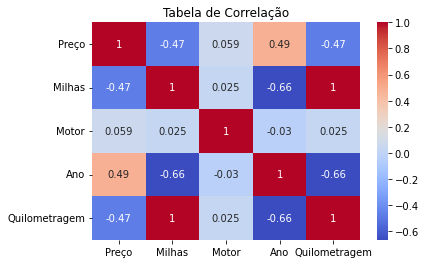

In [52]:

import matplotlib.pyplot as plt
import seaborn as sns

df = df.dropna()


corr_matrix = df.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Tabela de Correlação')
plt.show()

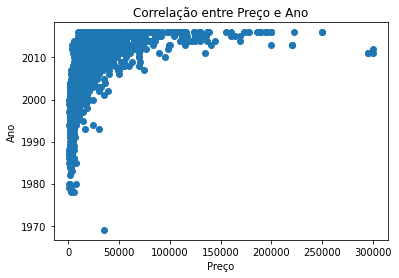

In [53]:

plt.scatter(x=df['Preço'], y=df['Ano'])

plt.title('Correlação entre Preço e Ano')
plt.xlabel('Preço')
plt.ylabel('Ano')

plt.show()

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

)Resposta:E o modelo de supervionado,pois tem dados que queremos prever

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta:A regressão linear.Pois, dado é a previsão do preço de algo com base no ano. O texto destaca que em casos reais essa correlação deveria existir, mas não é necessário para a aplicação da regressão linear.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1:

Algoritmo 2:

In [63]:
#1

#Algoritmo 1: 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['Preço']]
y = df['Quilometragem']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.2f}".format(r2))

R2 Score: 0.25


In [55]:
#2

X = df[['Marca', 'Preço', 'Tipo do carro', 'Motor', 'Tipo de combustivel', 'Registro', 'Ano', 'Modelo']]
y = df['Quilometragem']


X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.2f}".format(r2))

R2 Score: 0.55


## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [56]:
#Sua resposta aqui

from sklearn.model_selection import train_test_split
X = df[['Motor', 'Ano', 'Quilometragem']]
y = df['Preço']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [57]:
print("Preços de Treino (y_train):")
print(y_train.head())

Preços de Treino (y_train):
4338    11500.0
985      5900.0
2107     8500.0
2821    17500.0
4120    18800.0
Name: Preço, dtype: float64


In [58]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3220, 805, 3220, 805)

In [59]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3220, 3)
(805, 3)
(3220,)
(805,)


7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [60]:
#Sua resposta aqui

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

linear_pred = linear_reg.predict(X_test)

print("R2: {:.2f}".format(r2_score(y_test, linear_pred)))


R2: 0.28


7.2 - Algoritmo 2:  (0,5)

In [61]:
#Sua resposta aqui

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg.fit(X_train, y_train)

rf_pred = rf_reg.predict(X_test)

print("R2: {:.2f}".format(r2_score(y_test, rf_pred)))

R2: 0.85


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

*Resposta*:O 2,pois que utilizou o método de regressão de floresta aleatória, teve melhor desempenho do que o primeiro. Para avaliar a qualidade dos modelos, foram utilizadas três métricas: R2 score, RMSE e MAE. Quanto mais próximo de 1 o R2 score, melhor o modelo, e quanto mais próximos de 0 o RMSE e o MAE, melhor o modelo. Como o segundo modelo obteve o melhor resultado no R2 score, foi considerado o melhor dos dois.

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [62]:
#Sua resposta aqui

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

new_car = {'Motor': 2.0, 'Ano': 2005, 'Quilometragem': 172095}

new_car_df = pd.DataFrame(data=new_car, index=[0])

price = model.predict(new_car_df)

print(f"O preço previsto para o carro é: R$ {price[0]:.2f}")

O preço previsto para o carro é: R$ 17052.46
